In [1]:
!pip install numpy pandas matplotlib seaborn scikit-learn


  Using cached numpy-2.3.2-cp313-cp313-macosx_14_0_arm64.whl.metadata (62 kB)
  Using cached pandas-2.3.1-cp313-cp313-macosx_11_0_arm64.whl.metadata (91 kB)
  Using cached matplotlib-3.10.5-cp313-cp313-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached scikit_learn-1.7.1-cp313-cp313-macosx_12_0_arm64.whl.metadata (11 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached contourpy-1.3.3-cp313-cp313-macosx_11_0_arm64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.59.1-cp313-cp313-macosx_10_13_universal2.whl.metadata (108 kB)
  Using cached kiwisolver-1.4.9-cp313-cp313-macosx_11_0_arm64.whl.metadata (6.3 kB)
  Using cached pillow-11.3.0-cp313-cp313-macosx_11_0_arm64.whl.metadata (9.0 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
  Using 

1.Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

2.Load Dataset

In [ ]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
df.shape

(200, 5)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
print("\nMissing values per column:\n", df.isnull().sum())


Missing values per column:
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64



Numeric Columns for Correlation:
 Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')


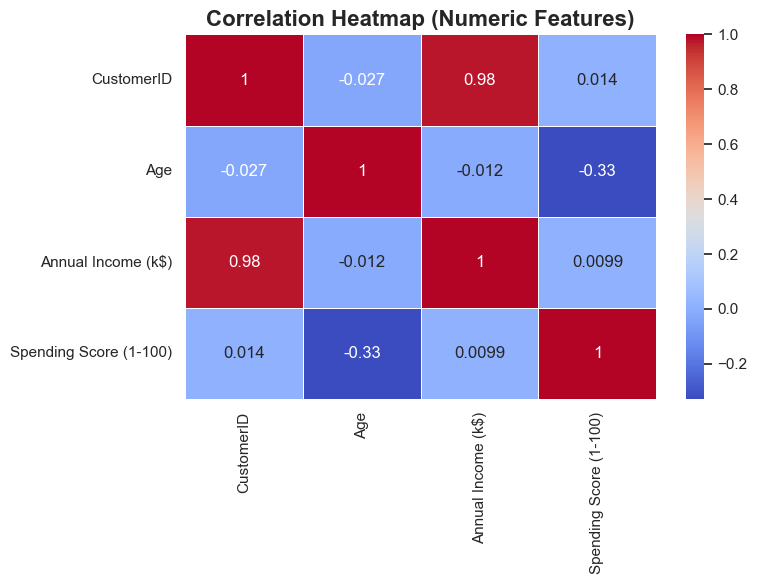

In [20]:
numeric_cols = df.select_dtypes(include=np.number)  # only numeric columns
print("\nNumeric Columns for Correlation:\n", numeric_cols.columns)

plt.figure(figsize=(8,6), facecolor='white')
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap (Numeric Features)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


3.Feature Selection

In [ ]:
X = df.iloc[:, [3, 4]].values  # Using Annual Income & Spending Score
print("\nSelected Features (X):\n", X)


Selected Features (X):
 [[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  

4.Determine Optimal Number of Clusters (Elbow Method)

In [ ]:
wcss = []

for i in range(1, 11):
    kmeans_model = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans_model.fit(X)
    wcss.append(kmeans_model.inertia_)

Plot the Elbow Graph

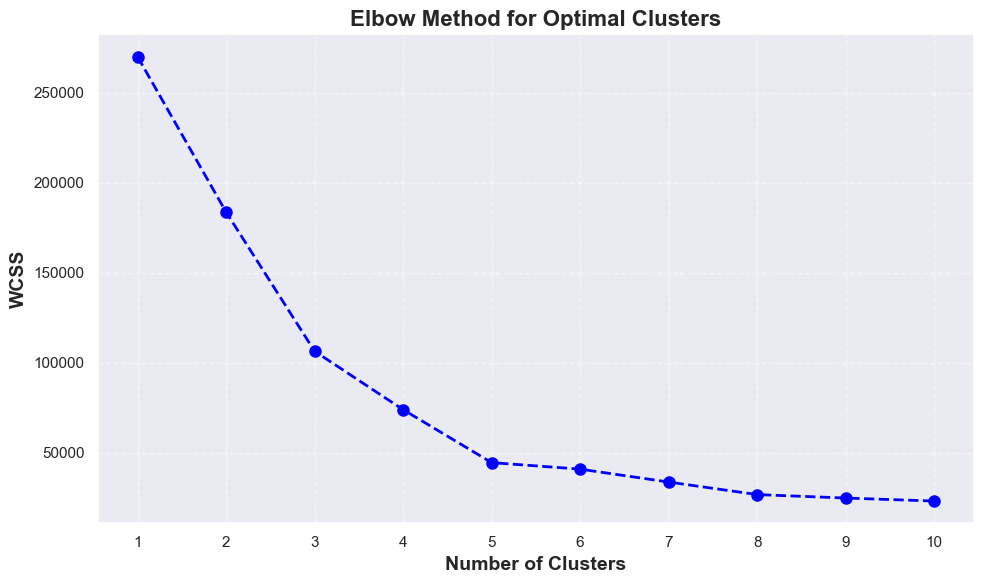

In [ ]:
plt.figure(figsize=(10,6), facecolor='white')
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='blue', linewidth=2, markersize=8)

# Axis labels and title
plt.xlabel('Number of Clusters', fontsize=14, fontweight='bold')
plt.ylabel('WCSS', fontsize=14, fontweight='bold')
plt.title('Elbow Method for Optimal Clusters', fontsize=16, fontweight='bold')

# Grid and layout
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(range(1, 11))  # make x-axis ticks clear
plt.tight_layout()
plt.show()


5. Fit K-Means with Optimal Clusters

In [ ]:
optimal_clusters = 5
kmeans_model = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=0)

# Cluster assignment
y_clusters = kmeans_model.fit_predict(X)
print("\nCluster Labels:\n", y_clusters)


Cluster Labels:
 [3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


Plot Clusters and Centroids

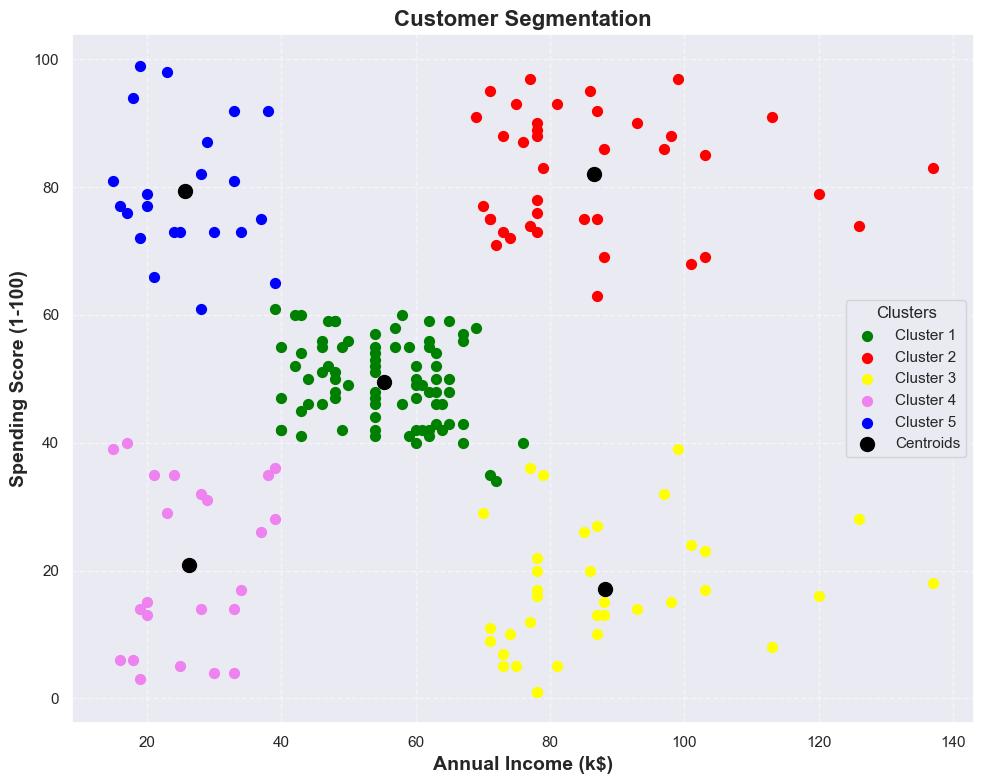

In [ ]:
plt.figure(figsize=(10,8), facecolor='white')

# Scatter each cluster
plt.scatter(X[y_clusters == 0, 0], X[y_clusters == 0, 1], s=50, c='green', label='Cluster 1')
plt.scatter(X[y_clusters == 1, 0], X[y_clusters == 1, 1], s=50, c='red', label='Cluster 2')
plt.scatter(X[y_clusters == 2, 0], X[y_clusters == 2, 1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X[y_clusters == 3, 0], X[y_clusters == 3, 1], s=50, c='violet', label='Cluster 4')
plt.scatter(X[y_clusters == 4, 0], X[y_clusters == 4, 1], s=50, c='blue', label='Cluster 5')

# Centroids in black
plt.scatter(kmeans_model.cluster_centers_[:, 0], kmeans_model.cluster_centers_[:, 1],
            s=100, c='black', label='Centroids')

# Axis labels and title
plt.xlabel('Annual Income (k$)', fontsize=14, fontweight='bold')
plt.ylabel('Spending Score (1-100)', fontsize=14, fontweight='bold')
plt.title('Customer Segmentation', fontsize=16, fontweight='bold')

# Grid, legend, and layout
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Clusters')
plt.tight_layout()
plt.show()


CLUSTER EVALUATION METRICS

In [ ]:
print("="*50)
print("CLUSTER EVALUATION METRICS")
print("="*50)

print(f"\nNumber of Clusters: {optimal_clusters}")
print(f"Silhouette Score: {sil_score:.4f}\n")

# Cluster sizes
for i in range(optimal_clusters):
    print(f"Cluster {i+1} Size: {sum(y_clusters == i)}")

# Cluster centroids
centroids_df = pd.DataFrame(kmeans_model.cluster_centers_, columns=['Annual Income', 'Spending Score'])
print("\nCluster Centroids:\n", centroids_df)

print("="*50)


CLUSTER EVALUATION METRICS

Number of Clusters: 5
Silhouette Score: 0.5539

Cluster 1 Size: 81
Cluster 2 Size: 39
Cluster 3 Size: 35
Cluster 4 Size: 23
Cluster 5 Size: 22

Cluster Centroids:
    Annual Income  Spending Score
0      55.296296       49.518519
1      86.538462       82.128205
2      88.200000       17.114286
3      26.304348       20.913043
4      25.727273       79.363636


Assign Descriptive Labels to Clusters

In [ ]:
cluster_labels = {
    0: 'Average',
    1: 'Premium',
    2: 'Smart Savers',
    3: 'Budget-Conscious',
    4: 'Impulsive Buyers'
}

# Map the numeric clusters to descriptive labels
df['Cluster Label'] = [cluster_labels[i] for i in y_clusters]

# Display first 10 rows to check
df[['Annual Income (k$)', 'Spending Score (1-100)', 'Cluster Label']].head(10)


,Annual Income (k$),Spending Score (1-100),Cluster Label
0,15,39,Budget-Conscious
1,15,81,Impulsive Buyers
2,16,6,Budget-Conscious
3,16,77,Impulsive Buyers
4,17,40,Budget-Conscious
5,17,76,Impulsive Buyers
6,18,6,Budget-Conscious
7,18,94,Impulsive Buyers
8,19,3,Budget-Conscious
9,19,72,Impulsive Buyers


Plot Clusters with Descriptive Labels

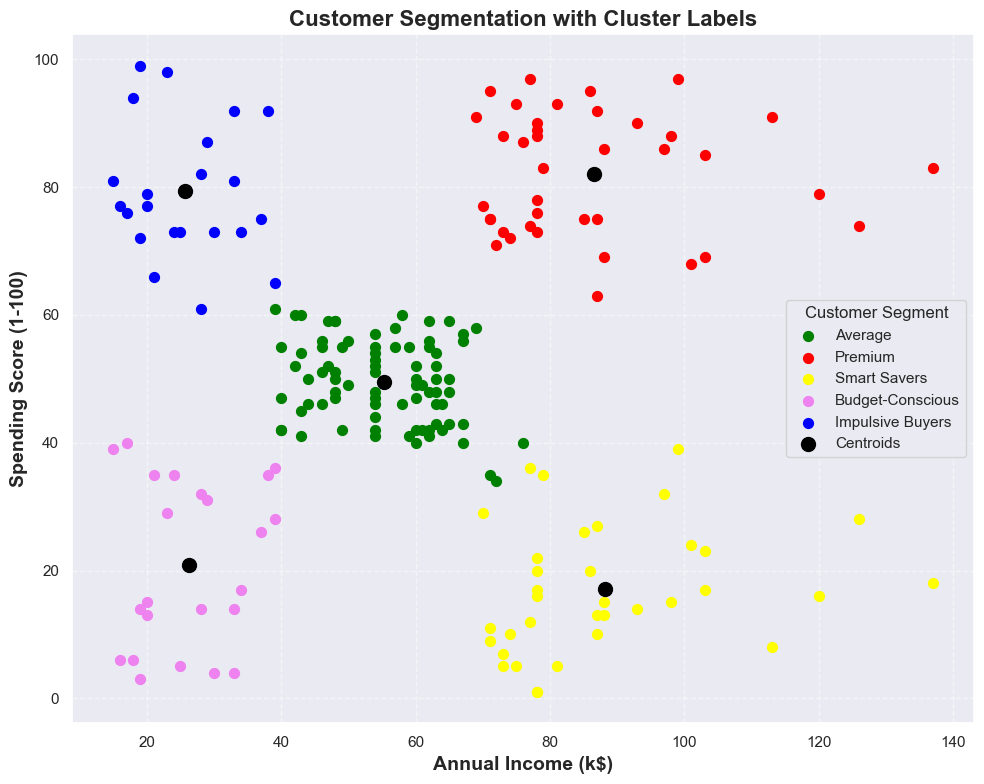

In [ ]:
plt.figure(figsize=(10,8), facecolor='white')

colors = ['green', 'red', 'yellow', 'violet', 'blue']
for i, label in enumerate(cluster_labels.values()):
    plt.scatter(
        X[y_clusters == i, 0], X[y_clusters == i, 1],
        s=50, c=colors[i], label=label
    )

# Centroids in black
plt.scatter(kmeans_model.cluster_centers_[:, 0], kmeans_model.cluster_centers_[:, 1],
            s=100, c='black', label='Centroids')

# Axis labels and title
plt.xlabel('Annual Income (k$)', fontsize=14, fontweight='bold')
plt.ylabel('Spending Score (1-100)', fontsize=14, fontweight='bold')
plt.title('Customer Segmentation with Cluster Labels', fontsize=16, fontweight='bold')

# Grid, legend, and layout
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Customer Segment')
plt.tight_layout()
plt.show()


Predict Cluster for New Customers with Descriptive Labels

In [ ]:
# Example new customers: [Annual Income, Spending Score]
new_customers = [[60, 50], [25, 80], [90, 20]]

# Predict cluster numbers
predicted_clusters = kmeans_model.predict(new_customers)

# Map cluster numbers to descriptive labels
predicted_labels = [cluster_labels[cluster] for cluster in predicted_clusters]

# Display results
print("="*50)
print("NEW CUSTOMER CLUSTER ASSIGNMENT")
print("="*50)
for i, label in enumerate(predicted_labels):
    print(f"New Customer {i+1} assigned to: {label}")
print("="*50)


NEW CUSTOMER CLUSTER ASSIGNMENT
New Customer 1 assigned to: Average
New Customer 2 assigned to: Impulsive Buyers
New Customer 3 assigned to: Smart Savers
